# <span style="color:darkblue"> QTM 151 - Quiz 5 </span>

## Try to submit as an HTML file

<font size="5"> 

Print your name below

In [46]:
# Write your answer here

print("Sophia Xiao")


Sophia Xiao


<font size = "5" >
This quiz is open book 

- You can use the lecture notes
- You will get partial credit for attempting the questions
- To get full credit, the code should run as intended
- You should <span style="color:red"> NOT </span> communicate with other students

Print the following message: <br>

"I will abide by Emory's code of conduct"


In [47]:
# Write your answer here:

print("I will abide by Emory's code of conduct")


I will abide by Emory's code of conduct


<font size = "5">

Import the libraries "matplotlib.pyplot" and "pandas"

In [48]:
# Write your answer here


import pandas as pd
import matplotlib.pyplot as plt

<font size = "5">

In this quiz you will work with data on exchange rates, <br>
for the following currencies:

- 1 euro (EUR) to dollar (USD)
- 1 pound (GPB) to dollar (USD).


<font size = "5">

(a) Import and parse dates

<font size = "3">

- Import the dataset "currencies.csv"
- Parse the "date_string" column with ```pd.to_datetime()```
- To get full points, set the "format" option using wildcards as in Lecture 21.


In [60]:
# Write your own code
currencies = pd.read_csv("/Users/sophiaxiao/Documents/GitHub/emoryqtm151/Quiz 5 - Section 3/data_raw/currencies.csv")

currencies
print(currencies["date_string"])
currencies["date"] = pd.to_datetime(currencies["date_string"], format = "%A, %b %d, %Y")

currencies["date"]

0          Monday, Jan 04, 1999
1         Tuesday, Jan 05, 1999
2       Wednesday, Jan 06, 1999
3        Thursday, Jan 07, 1999
4          Friday, Jan 08, 1999
                 ...           
6320       Monday, Mar 27, 2023
6321      Tuesday, Mar 28, 2023
6322    Wednesday, Mar 29, 2023
6323     Thursday, Mar 30, 2023
6324       Friday, Mar 31, 2023
Name: date_string, Length: 6325, dtype: object


0      1999-01-04
1      1999-01-05
2      1999-01-06
3      1999-01-07
4      1999-01-08
          ...    
6320   2023-03-27
6321   2023-03-28
6322   2023-03-29
6323   2023-03-30
6324   2023-03-31
Name: date, Length: 6325, dtype: datetime64[ns]

<font size = "5">

(b) Plot multiple time series

<font size = "3">

- Create a line plot plot which has the "gbp_to_usd" and "eur_to_usd" on the y-axis <br>
and the date on the x-axis
- Label the x-axis, the y-axis, and the title
- Add a legend and set the names to "1 Euro to USD" and "1 GPB to USD"

Hint: See Lecture 22 for how to plot multiple columns <br>
Hint: Remember to include the legend names as a list ```[...]```


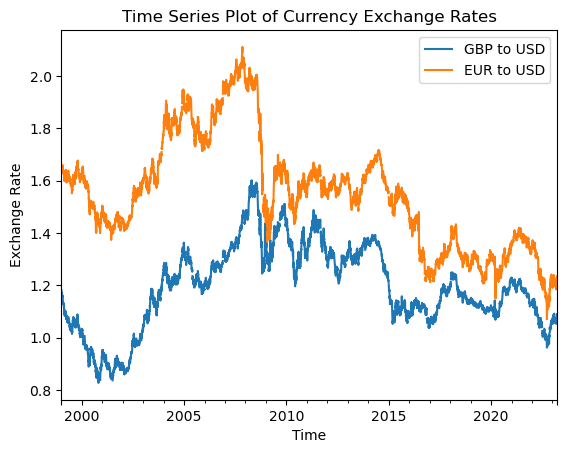

In [50]:
# Write your own code


currencies[["date","gbp_to_usd","eur_to_usd"]].set_index("date").plot()
plt.xlabel("Time")
plt.ylabel("Exchange Rate")
plt.legend(["GBP to USD","EUR to USD"])
plt.title("Time Series Plot of Currency Exchange Rates")

plt.show()

<font size = "5">

(c) Compute growth rates

<font size = "3">

- Calculate a new column "growth_euro" which computes the percentage daily <br>
growth rate of "eur_to_usd".

Hint: Use ```.diff()``` and ```.shift(1)``` as in Lecture 22

In [61]:
# Write your own code
currencies.sort_values(by = "date", inplace = True)

currencies["diff_eur_to_usd"] = currencies["eur_to_usd"].diff() 

currencies["lag_eur_to_usd"]    = currencies["eur_to_usd"].shift(1) 

# Compute growth rate: (diff * 100) / lag
currencies["growth_euro"] = currencies["diff_eur_to_usd"]* 100/currencies["lag_eur_to_usd"] 
currencies["growth_euro"] 


0            NaN
1      -0.090465
2      -0.114693
3      -0.314256
4      -0.545620
          ...   
6320    0.433538
6321    0.513113
6322   -0.226886
6323    0.446682
6324    0.008085
Name: growth_euro, Length: 6325, dtype: float64

<font size = "5">

(d) Flag subset of data and plot

<font size = "3">

- Create a boolean colum (True/False) "bool_cond" which checks whether <br>
"growth_euro" had a value greater than 2 or less than -2
- Generate a line plot with the "growth_euro" series, label the axes and the title
- Use the command ```plt.fill_between()``` as in Lecture 22 to create a shaded region <br>
for time periods where "bool_cond" is true.



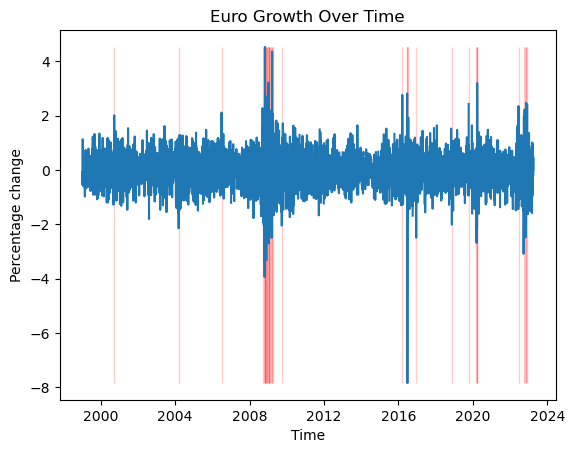

In [63]:
# Write your own code
currencies["bool_cond"] = (currencies["growth_euro"] > 2) | (currencies["growth_euro"] < -2 )


# Produce plot:
# Create a line plot
plt.plot("date", "growth_euro", data = currencies)
plt.xlabel("Time")
plt.ylabel("Percentage change")
plt.title("Euro Growth Over Time")

# Add a shaded region wth a rectangle
# "x" is the x-coordinates, "y1" and "y2" are the lower
# and upper bounds of the rectangle. We can set this
# to be the minimum and meximum of the outcome.
# we use "where" to test a logical condition

vec_y = currencies["growth_euro"]
plt.fill_between(x= currencies["date"],
                 y1 = vec_y.min(),
                 y2 = vec_y.max(),
                 where = currencies["bool_cond"],
                 alpha = 0.2, color = "red")

plt.show()





<font size = "5">

(e) Aggregate dataset by time period

<font size = "3">

- Create an object "month_config" that uses ```pd.Grouper()```, setting the key to <br>
the column "date" and freq to "m" (month)
- Follow the instructions in Lecture 21 to compute an aggregate dataset <br>
by month which computes the standard deviation of "eur_to_usd"
- Display the dataset




In [64]:
# Write your own code

month_config = pd.Grouper(key = "date", freq = "m")
# Group on the period column
# We use a wrapper () to split the command into multiple lines
# The ".reset_index()" option ensures that the grouper is
# converted to a column. This is important for plotting.
# There's a lot of options to 

monthlydata = (currencies
               .groupby(month_config) 
               .agg(eur_std = ("eur_to_usd","std"))
               .reset_index())

monthlydata

,date,eur_std
0,1999-01-31,0.007345
1,1999-02-28,0.013345
2,1999-03-31,0.010475
3,1999-04-30,0.006172
4,1999-05-31,0.013046
...,...,...
286,2022-11-30,0.027308
287,2022-12-31,0.011389
288,2023-01-31,0.015046
289,2023-02-28,0.008972


<font size = "5">

(f) Convert a dataset to long format

<font size = "3">

- Convert the currencies dataset to long format using the following inputs

```
var_name   = "type",
value_name = "exchange_rate",
id_vars    = "date",
value_vars = ["eur_to_usd","gbp_to_usd"]
```

- Display the dataset

Hint: See Lecture 22 for details on ```pd.melt()```

In [65]:
# Write your own code

currencies_long = pd.melt(currencies,
                         var_name   = "type",
                         value_name = "exchange_rate",
                         id_vars= "date", # ID variable
                         value_vars=["eur_to_usd","gbp_to_usd"]) # columns that get unpivoted (ie, stacked together to a long and skinny shape)

currencies_long

,date,type,exchange_rate
0,1999-01-04,eur_to_usd,1.6581
1,1999-01-05,eur_to_usd,1.6566
2,1999-01-06,eur_to_usd,1.6547
3,1999-01-07,eur_to_usd,1.6495
4,1999-01-08,eur_to_usd,1.6405
...,...,...,...
12645,2023-03-27,gbp_to_usd,1.0789
12646,2023-03-28,gbp_to_usd,1.0844
12647,2023-03-29,gbp_to_usd,1.0826
12648,2023-03-30,gbp_to_usd,1.0899
